In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

from sqlalchemy import Column, Integer, String, Float
from sqlalchemy import create_engine, inspect
from sqlalchemy.ext.declarative import declarative_base
Base = declarative_base()
from datetime import datetime, timedelta
import dateutil.relativedelta

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Explore Database

In [10]:
# Use the Inspector to explore the database and print the table names
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [11]:
measurementAll="""
select
*
from Measurement
limit 10
"""
engine.execute(measurementAll).fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0)]

In [12]:
stationAll="""
select
*
from station
limit 10
"""
engine.execute(stationAll).fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [13]:
# Use Inspector to print the column names and types for measurement
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [14]:
# Use Inspector to print the column names and types for station
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Climate Analysis

The first date of the last twelve months is 2016-08-23 00:00:00
The last date of the last twelve months is 2017-08-23 00:00:00


<function matplotlib.pyplot.show(*args, **kw)>

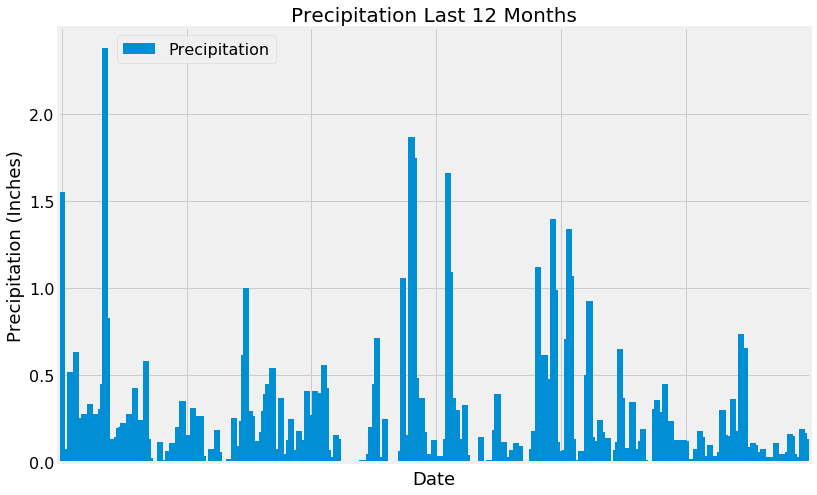

In [15]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

last_date=session.query(Measurement.date).order_by(Measurement.date.desc()).first().date
last_date= datetime.strptime(last_date, '%Y-%m-%d')

first_date = last_date-timedelta(days=365)
print(f"The first date of the last twelve months is {first_date}")
print(f"The last date of the last twelve months is {last_date}")

result = session.query(Measurement.date, func.avg(Measurement.prcp)).\
                        filter(Measurement.date >= first_date).\
                        group_by(Measurement.date).all()

# Convert data into dataframe
last12_precipitation = pd.DataFrame(result, columns=['Date', 'Precipitation'])
last12_precipitation.set_index('Date', inplace=True)
last12_precipitation

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data
plot_base = last12_precipitation.plot(kind='bar', width=3, figsize=(12,8))
plt.locator_params(axis='x', nbins=6)
plot_base.xaxis.set_major_formatter(plt.NullFormatter())
plot_base.tick_params(axis='y', labelsize=16)
plot_base.grid(True)
plt.legend(bbox_to_anchor=(.3,1), fontsize="16")
plt.title("Precipitation Last 12 Months", size=20)
plt.ylabel("Precipitation (Inches)", size=18)
plt.xlabel("Date", size=18)
plt.savefig("C:/Users/Kyoo Ha Cha/Desktop/SMUGitlab/SMU_Homework/Unit_10_Advanced-Data-Storage-and-Retrieval/Instructions/Precipitation.png")
plt.show

![precipitation](Images/precipitation.png)

In [16]:
# Use Pandas to calcualte the summary statistics for the precipitation data
last12_precipitation.describe()

,Precipitation
count,365.000000
mean,0.169987
std,0.295722
min,0.000000
25%,0.008571
50%,0.070000
75%,0.191667
max,2.380000


![describe](Images/describe.png)

In [17]:
# Design a query to show how many stations are available in this dataset?
session.query(func.count(Station.name)).all()

[(9)]

In [18]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
most_active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
            group_by(Measurement.station).\
            order_by(func.count(Measurement.station).desc()).all()
most_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [19]:
most_active_station = [i[0] for i in most_active_stations][0]
most_active_station

'USC00519281'

In [20]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
most_active_temperature = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == most_active_station).all()
most_active_temperature    

[(54.0, 85.0, 71.66378066378067)]

In [21]:
last12_precipitation.head()

,Precipitation
Date,
2016-08-24,1.555000
2016-08-25,0.077143
2016-08-26,0.016667
2016-08-27,0.064000
2016-08-28,0.516667


In [22]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
USC00519281 = session.query(Measurement.station, Measurement.tobs).\
                filter(Measurement.station == most_active_station).\
                filter(Measurement.date >= first_date).all()
USC00519281 = pd.DataFrame(USC00519281)
USC00519281.set_index('station', inplace=True)
USC00519281.head()

,tobs
station,
USC00519281,77.0
USC00519281,80.0
USC00519281,80.0
USC00519281,75.0
USC00519281,73.0


<function matplotlib.pyplot.show(*args, **kw)>

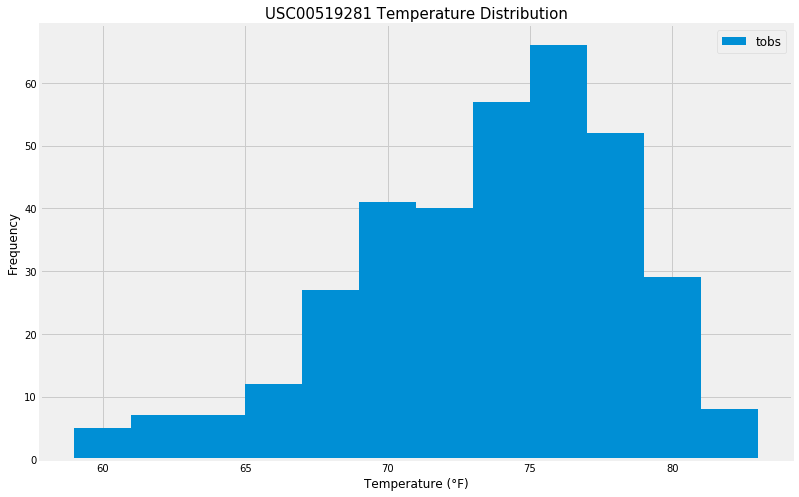

In [32]:
USC00519281.plot.hist(by='station', bins=12, figsize=(12,8))
plot_base.grid(True)
plt.title(most_active_station + " Temperature Distribution", fontsize=15)
plt.xlabel("Temperature (°F)", fontsize=12)
plt.legend(bbox_to_anchor=(1,1), fontsize=12)
plt.savefig("C:/Users/Kyoo Ha Cha/Desktop/SMUGitlab/SMU_Homework/Unit_10_Advanced-Data-Storage-and-Retrieval/Instructions/StationTemps.png")
plt.show

![precipitation](Images/station-histogram.png)

In [24]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [26]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
start_date = dt.date(2012, 2, 28)
end_date = dt.date(2012, 3, 5)
#one_year_ago = dt.timedelta(days=365)
temps_year_ago = (calc_temps((start_date-timedelta(days=365)), (end_date-timedelta(days=365))))
print(temps_year_ago)

[(61.0, 70.08928571428571, 75.0)]


C:\Users\Kyoo Ha Cha\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


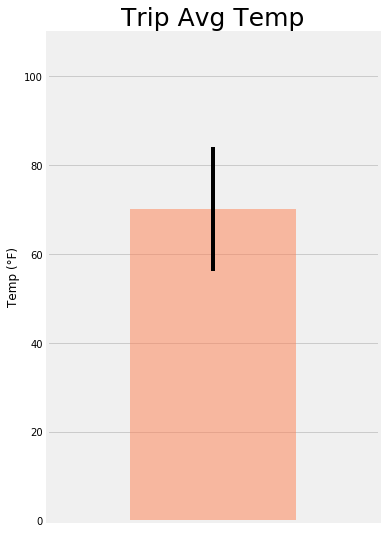

In [33]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
trip_df = pd.DataFrame(temps_year_ago, columns=['Min_Temp', 'Mean_Temp', 'Max_Temp'])
avg_temp = trip_df['Mean_Temp']
min_max_temp = trip_df.iloc[0]['Max_Temp'] - trip_df.iloc[0]['Min_Temp']
avg_temp.plot(kind='bar', yerr=min_max_temp, figsize=(5.3,9), alpha=0.5, color='coral')
ax = plt.axes()        
ax.yaxis.grid()
axes = plt.gca()
axes.set_ylim([0,110])
plt.title("Trip Avg Temp", fontsize=25)
plt.ylabel("Temp (°F)")
plt.xticks([])
plt.grid()
plt.savefig("C:/Users/Kyoo Ha Cha/Desktop/SMUGitlab/SMU_Homework/Unit_10_Advanced-Data-Storage-and-Retrieval/Instructions/TripMeanTempSummary.png")
plt.show()

In [28]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
total_rainfall_stations=session.query(Station.station,
                  func.sum(Measurement.prcp),
                  Station.name,
                  Station.elevation,                                    
                  Station.latitude,
                  Station.longitude)\
.filter(Measurement.station == Station.station)\
.filter(Measurement.date >= start_date)\
.filter(Measurement.date <= end_date)\
.group_by(Station.station)\
.order_by(func.sum(Measurement.prcp).desc())
for result in total_rainfall_stations: print(result)


('USC00519281', 11.08, 'WAIHEE 837.5, HI US', 32.9, 21.45167, -157.84888999999998)
('USC00516128', 10.32, 'MANOA LYON ARBO 785.2, HI US', 152.4, 21.3331, -157.8025)
('USC00513117', 5.79, 'KANEOHE 838.1, HI US', 14.6, 21.4234, -157.8015)
('USC00518838', 3.8400000000000003, 'UPPER WAHIAWA 874.3, HI US', 306.6, 21.4992, -158.0111)
('USC00519523', 2.92, 'WAIMANALO EXPERIMENTAL FARM, HI US', 19.5, 21.33556, -157.71139)
('USC00519397', 1.1800000000000002, 'WAIKIKI 717.2, HI US', 3.0, 21.2716, -157.8168)
('USC00511918', 0.76, 'HONOLULU OBSERVATORY 702.2, HI US', 0.9, 21.3152, -157.9992)
('USC00514830', 0.03, 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 7.0, 21.5213, -157.8374)
('USC00517948', 0.0, 'PEARL CITY, HI US', 11.9, 21.3934, -157.9751)


## Optional Challenge Assignment

In [20]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [21]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


[(62.0, 69.15384615384616, 77.0),
 (60.0, 69.39622641509433, 77.0),
 (62.0, 68.9090909090909, 77.0),
 (58.0, 70.0, 76.0),
 (56.0, 67.96428571428571, 76.0),
 (61.0, 68.96491228070175, 76.0),
 (57.0, 68.54385964912281, 76.0)]

In [22]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


,tmin,tavg,tmax
date,,,
2018-01-01,62.0,69.153846,77.0
2018-01-02,60.0,69.396226,77.0
2018-01-03,62.0,68.909091,77.0
2018-01-04,58.0,70.000000,76.0
2018-01-05,56.0,67.964286,76.0


<IPython.core.display.Javascript object>


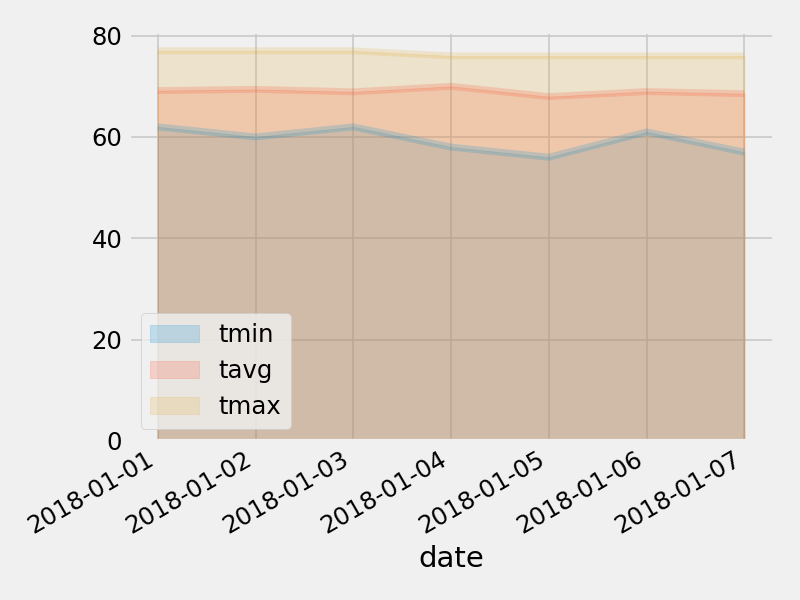

In [23]:
# Plot the daily normals as an area plot with `stacked=False`
